In [0]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import matplotlib.pyplot as plt

# Regresión Lineal

---



<function matplotlib.pyplot.show>

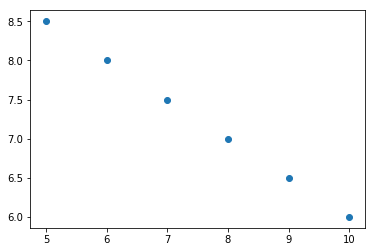

In [3]:
car_prices = [5, 6, 7, 8, 9, 10]
units_sold = [8.5, 8, 7.5, 7.0, 6.5, 6.0]

plt.scatter(car_prices, units_sold)
plt.show

In [6]:
prices_array = np.array(car_prices).reshape(-1,1)

units_array = np.array(units_sold).reshape(-1,1)

prices_array.shape

(6, 1)

In [11]:
prices = torch.from_numpy(prices_array).float().requires_grad_(True)
units = torch.from_numpy(units_array).float()

prices, prices.shape

(tensor([[ 5.],
         [ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.]], requires_grad=True), torch.Size([6, 1]))

tensor(0.0160, grad_fn=<MseLossBackward>)


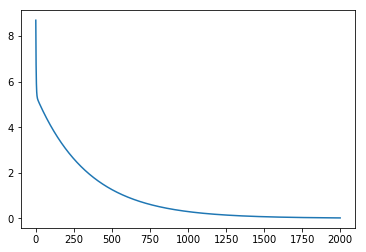

In [20]:
model = nn.Linear(1, 1)
loss_function = nn.MSELoss()

optimizer = optim.SGD(model.parameters(), lr=0.015)

losses = []
iterations = 2000

for i in range(iterations):
  pred = model(prices)
  loss = loss_function(pred, units)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  # print(i, loss.data.numpy())

print(loss)
plt.plot(range(iterations), losses)
plt.show()


In [21]:
x = torch.Tensor([[4.0]])

p = model(x)
p

tensor([[8.7200]], grad_fn=<AddmmBackward>)

# Regresión Logística

---



In [41]:
n = 100
h = n//2
dimen = 2

data = np.random.randn(n, dimen)*3
data

array([[-7.27768103e+00, -4.96702053e-01],
       [ 2.61552063e+00,  1.71777214e+00],
       [ 1.59300662e+00,  2.71310295e+00],
       [ 7.04426983e-01, -7.56062551e-01],
       [ 1.08818153e+00, -2.22744307e+00],
       [-5.32780262e-01, -5.25098627e+00],
       [-5.18668631e-01, -1.98895136e+00],
       [-8.10834401e-01,  1.19466605e+00],
       [-3.68751487e+00, -1.77853890e+00],
       [-1.20898451e+00,  1.22975735e+00],
       [-5.32324378e-03,  2.94459788e+00],
       [ 5.65864143e+00, -5.00689923e+00],
       [-1.80139897e-01,  3.33961585e+00],
       [ 2.62040339e+00, -2.66519699e+00],
       [ 4.62053287e+00,  4.24585218e+00],
       [-7.31271387e-01,  2.70903336e+00],
       [ 3.74242945e+00,  3.06334139e+00],
       [ 1.79264167e+00,  3.99813795e+00],
       [-2.13938343e-01, -2.51613460e-01],
       [ 8.46636682e-01, -8.03833459e-01],
       [-4.02878200e+00, -2.42304976e+00],
       [ 2.11663078e+00, -1.39945111e+00],
       [ 4.06067820e+00, -2.72308604e+00],
       [ 4.

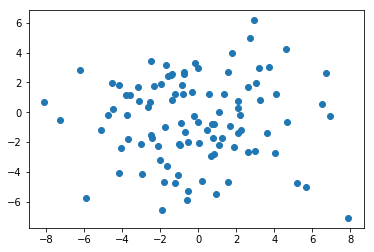

In [42]:
plt.scatter(data[:,0], data[:,1])

In [0]:
data[:h, :]= data[:h, :] - 3*np.ones((h, dimen))

In [0]:
data[h:, :]= data[h:, :] + 3*np.ones((h, dimen))

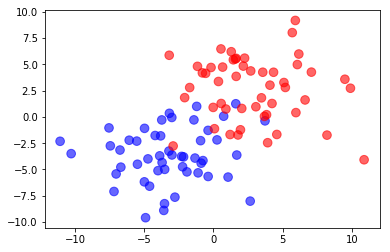

In [50]:
colors = ['blue','red']

color = np.array([colors[0]]*h + [colors[1]]*h).reshape(n)
plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

In [52]:
target = np.array([0]*h + [1]*h).reshape(n, 1)

x = torch.from_numpy(data).float().requires_grad_(True)

y = torch.from_numpy(target).float()

x.shape, y.shape

(torch.Size([100, 2]), torch.Size([100, 1]))

tensor(0.1817, grad_fn=<BinaryCrossEntropyBackward>)

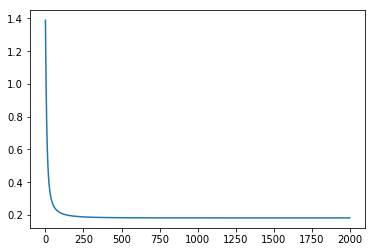

In [59]:
model = nn.Sequential(
          nn.Linear(2,1),
          nn.Sigmoid()
      )
loss_function = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = []

iterations = 2000

for i in range(iterations):
  result = model(x)
  
  loss = loss_function(result, y)
  losses.append(loss.data)
  
  optimizer.zero_grad()
  loss.backward()
  
  optimizer.step()

plt.plot(range(iterations), losses)
loss

In [62]:
blue = torch.Tensor([[-5, -6]])
prediction = model(blue).data[0][0] > 0.5
print(colors[prediction])

red = torch.Tensor([[8, 6]])
prediction = model(red).data[0][0] > 0.5
print(colors[prediction])


blue
red


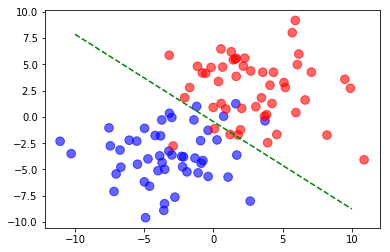

In [63]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

plt.scatter(data[:,0], data[:,1], c=color, s=75, alpha=0.6)

x_axis = np.linspace(-10, 10, n)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
plt.plot(x_axis, y_axis,'g--')